# Ferguson Classification
*January 14*

First trial run after labeling 2000 sentences

In [22]:
import json
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import linear_model
from sklearn.model_selection import cross_validate, cross_val_score, train_test_split, GroupKFold
from sklearn.metrics import f1_score, average_precision_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import metrics
import seaborn as sn

## Monologic Voice

In [23]:
file_name = "Annotations/monologic_annotations.json"
annotations = []
for line in open(file_name, 'r'):
    annotations.append(json.loads(line))

annotations_df = pd.DataFrame(annotations)
annotations_df.head(5)

,Unnamed: 0,Unnamed: 0.1,opinion_num,categority,author,case,text,sent_index,length,sent_location,prediction,prob_0,prob_1,_input_hash,_task_hash,label,_session_id,_view_id,answer
0,377463,377463,3642,dissenting,Justice Thomas,Reyes Mata v. Lynch,And they should\napply the ordinary rule that ...,30,34,0.882353,1,0.485290,0.514710,-1275484070,-689703587,MONOLOGIC,None,classification,reject
1,953867,953867,8962,majority,Justice Thomas,"Professional Real Estate Investors, Inc. v. Co...",The sham exception so construed would undermin...,137,218,0.628440,1,0.337235,0.662765,1819283346,1898932554,MONOLOGIC,None,classification,reject
2,277192,277192,2673,majority,Justice Burton,Order of United Commercial Travelers of Americ...,The prohibition limiting the time for suing on...,144,295,0.488136,1,0.282745,0.717255,1411906233,-909861218,MONOLOGIC,None,classification,reject
3,217250,217250,2124,dissenting,Justice Stewart,Simpson v. Union Oil Co. of Cal.,"To answer that question, the Court examined th...",21,56,0.375000,1,0.335661,0.664339,-1857841816,-1068803877,MONOLOGIC,None,classification,reject
4,1417865,1417865,13283,second_dissenting,Justice Ginsburg,"DIRECTV, Inc. v. Imburgia",is not a sufficient reason\nto hold that arbit...,122,174,0.701149,1,0.188354,0.811646,91625303,2113589606,MONOLOGIC,None,classification,reject


In [24]:
annotations_df["label_num"] = annotations_df["answer"].map({'accept': 1, 'reject': 0, 'ignore': 0})
annotations_df.answer.value_counts()

reject    1538
accept     460
ignore       1
Name: answer, dtype: int64

In [25]:
grouped = annotations_df.groupby(["answer"])
grouped.prob_1.mean()

answer
accept    0.779685
ignore    0.679398
reject    0.709784
Name: prob_1, dtype: float64

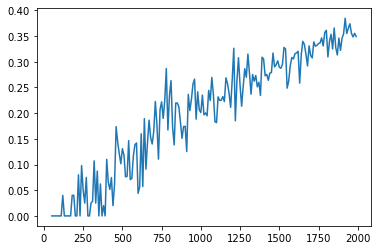

In [27]:
sample_sizes = range(50, len(annotations_df.label_num), 10)

vectorizer = TfidfVectorizer(
    encoding='utf-8',
    min_df=2, 
    max_df=0.8, 
    binary=False,
    norm='l2',
    use_idf=True 
)

# Classification
lr = LogisticRegression()
x_values = []
y_values = []
scores_l = []

for i in sample_sizes:
    sample_df = annotations_df.sample(n=i)
    y_opinions = sample_df["label_num"]
    tfidf_m = vectorizer.fit_transform(sample_df.text)
    X_opinions = pd.DataFrame(tfidf_m.toarray(), index=y_opinions, columns=vectorizer.get_feature_names())
    # Cross validation
    scores = cross_validate(lr, X_opinions, y_opinions, cv=5, scoring=['accuracy', 'f1', 'f1_macro', 'f1_micro'])
    scores_l.append(scores)
    x = len(y_opinions)
    x_values.append(x)
    y = np.mean(scores.get("test_f1"))
    y_values.append(y)

plt.plot(x_values, y_values);

In [28]:
baseline_accuracy = sum(y_opinions)/len(y_opinions)
baseline_precision = baseline_accuracy
baseline_recall = 1.0
baseline_f1 = 2*baseline_precision*baseline_recall/(baseline_precision+baseline_recall)
print("Baseline accuracy:", round(baseline_accuracy, 3))
print("Baseline F1:", round(baseline_f1, 3))

Baseline accuracy: 0.23
Baseline F1: 0.374


In [29]:
lr = LogisticRegression()
scores = cross_validate(lr, X_opinions, y_opinions, cv=10, scoring=['accuracy', 'f1', 'f1_macro', 'f1_micro'])
print("Test f1: "+str(np.mean(scores.get("test_f1"))))
print("Test accuracy: "+str(np.mean(scores.get("test_accuracy"))))

Test f1: 0.349029924999022
Test accuracy: 0.8145728643216079


In [30]:
y_opinions = annotations_df["label_num"]
tfidf_m = vectorizer.fit_transform(annotations_df.text)
X_opinions = pd.DataFrame(tfidf_m.toarray(), index=y_opinions, columns=vectorizer.get_feature_names())
lr.fit(X_opinions, y_opinions)
y_best = lr.predict(X_opinions)

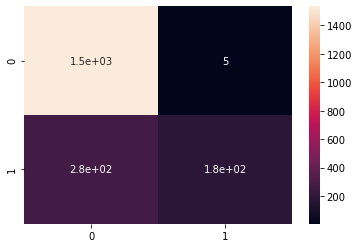

In [31]:
confusion_m = metrics.confusion_matrix(y_opinions, y_best)
sn.heatmap(confusion_m, annot=True);

## Interrogative

In [32]:
file_name = "Annotations/interrogative_annotations.json"
annotations = []
for line in open(file_name, 'r'):
    annotations.append(json.loads(line))

annotations_df = pd.DataFrame(annotations)
annotations_df.head(5)

,Unnamed: 0,Unnamed: 0.1,opinion_num,categority,author,case,text,sent_index,length,sent_location,prediction,prob_0,prob_1,_input_hash,_task_hash,label,_session_id,_view_id,answer
0,377463,377463,3642,dissenting,Justice Thomas,Reyes Mata v. Lynch,And they should\napply the ordinary rule that ...,30,34,0.882353,1,0.485290,0.514710,-1275484070,-2061477599,INTERROGATIVE,None,classification,reject
1,953867,953867,8962,majority,Justice Thomas,"Professional Real Estate Investors, Inc. v. Co...",The sham exception so construed would undermin...,137,218,0.628440,1,0.337235,0.662765,1819283346,-946175615,INTERROGATIVE,None,classification,reject
2,277192,277192,2673,majority,Justice Burton,Order of United Commercial Travelers of Americ...,The prohibition limiting the time for suing on...,144,295,0.488136,1,0.282745,0.717255,1411906233,-1196224706,INTERROGATIVE,None,classification,reject
3,217250,217250,2124,dissenting,Justice Stewart,Simpson v. Union Oil Co. of Cal.,"To answer that question, the Court examined th...",21,56,0.375000,1,0.335661,0.664339,-1857841816,-1425886346,INTERROGATIVE,None,classification,reject
4,1417865,1417865,13283,second_dissenting,Justice Ginsburg,"DIRECTV, Inc. v. Imburgia",is not a sufficient reason\nto hold that arbit...,122,174,0.701149,1,0.188354,0.811646,91625303,1565706008,INTERROGATIVE,None,classification,reject


In [33]:
annotations_df["label_num"] = annotations_df["answer"].map({'accept': 1, 'reject': 0, 'ignore': 0})
annotations_df.answer.value_counts()

reject    1767
accept     232
Name: answer, dtype: int64

In [34]:
grouped = annotations_df.groupby(["answer"])
grouped.prob_1.mean()

answer
accept    0.772180
reject    0.719772
Name: prob_1, dtype: float64

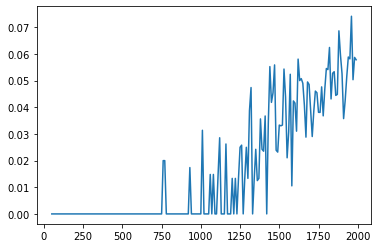

In [36]:
sample_sizes = range(50, len(annotations_df.label_num), 10)

vectorizer = TfidfVectorizer(
    encoding='utf-8',
    min_df=2, 
    max_df=0.8, 
    binary=False,
    norm='l2',
    use_idf=True 
)

# Classification
lr = LogisticRegression()
x_values = []
y_values = []
scores_l = []

for i in sample_sizes:
    sample_df = annotations_df.sample(n=i)
    y_opinions = sample_df["label_num"]
    tfidf_m = vectorizer.fit_transform(sample_df.text)
    X_opinions = pd.DataFrame(tfidf_m.toarray(), index=y_opinions, columns=vectorizer.get_feature_names())
    # Cross validation
    scores = cross_validate(lr, X_opinions, y_opinions, cv=5, scoring=['accuracy', 'f1', 'f1_macro', 'f1_micro'])
    scores_l.append(scores)
    x = len(y_opinions)
    x_values.append(x)
    y = np.mean(scores.get("test_f1"))
    y_values.append(y)

plt.plot(x_values, y_values);

In [37]:
baseline_accuracy = sum(y_opinions)/len(y_opinions)
baseline_precision = baseline_accuracy
baseline_recall = 1.0
baseline_f1 = 2*baseline_precision*baseline_recall/(baseline_precision+baseline_recall)
print("Baseline accuracy:", round(baseline_accuracy, 3))
print("Baseline F1:", round(baseline_f1, 3))

Baseline accuracy: 0.115
Baseline F1: 0.206


In [38]:
lr = LogisticRegression()
scores = cross_validate(lr, X_opinions, y_opinions, cv=10, scoring=['accuracy', 'f1', 'f1_macro', 'f1_micro'])
print("Test f1: "+str(np.mean(scores.get("test_f1"))))
print("Test accuracy: "+str(np.mean(scores.get("test_accuracy"))))

Test f1: 0.06510590858416945
Test accuracy: 0.8889447236180905


In [39]:
y_opinions = annotations_df["label_num"]
tfidf_m = vectorizer.fit_transform(annotations_df.text)
X_opinions = pd.DataFrame(tfidf_m.toarray(), index=y_opinions, columns=vectorizer.get_feature_names())
lr.fit(X_opinions, y_opinions)
y_best = lr.predict(X_opinions)

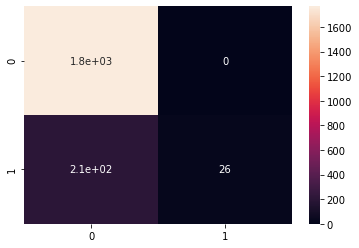

In [40]:
confusion_m = metrics.confusion_matrix(y_opinions, y_best)
sn.heatmap(confusion_m, annot=True);

# Declarative

In [41]:
file_name = "Annotations/declarative_annotations.json"
annotations = []
for line in open(file_name, 'r'):
    annotations.append(json.loads(line))

annotations_df = pd.DataFrame(annotations)
annotations_df.head(5)

,Unnamed: 0,Unnamed: 0.1,opinion_num,categority,author,case,text,sent_index,length,sent_location,prediction,prob_0,prob_1,_input_hash,_task_hash,label,_session_id,_view_id,answer
0,377463,377463,3642,dissenting,Justice Thomas,Reyes Mata v. Lynch,And they should\napply the ordinary rule that ...,30,34,0.882353,1,0.485290,0.514710,-1275484070,-1729162645,DECLARATIVE,None,classification,accept
1,953867,953867,8962,majority,Justice Thomas,"Professional Real Estate Investors, Inc. v. Co...",The sham exception so construed would undermin...,137,218,0.628440,1,0.337235,0.662765,1819283346,40014867,DECLARATIVE,None,classification,accept
2,277192,277192,2673,majority,Justice Burton,Order of United Commercial Travelers of Americ...,The prohibition limiting the time for suing on...,144,295,0.488136,1,0.282745,0.717255,1411906233,2017744667,DECLARATIVE,None,classification,reject
3,217250,217250,2124,dissenting,Justice Stewart,Simpson v. Union Oil Co. of Cal.,"To answer that question, the Court examined th...",21,56,0.375000,1,0.335661,0.664339,-1857841816,825335310,DECLARATIVE,None,classification,reject
4,1417865,1417865,13283,second_dissenting,Justice Ginsburg,"DIRECTV, Inc. v. Imburgia",is not a sufficient reason\nto hold that arbit...,122,174,0.701149,1,0.188354,0.811646,91625303,834218856,DECLARATIVE,None,classification,accept


In [42]:
annotations_df["label_num"] = annotations_df["answer"].map({'accept': 1, 'reject': 0, 'ignore': 0})
annotations_df.answer.value_counts()

reject    1088
accept     911
Name: answer, dtype: int64

In [43]:
grouped = annotations_df.groupby(["answer"])
grouped.prob_1.mean()

answer
accept    0.753777
reject    0.702475
Name: prob_1, dtype: float64

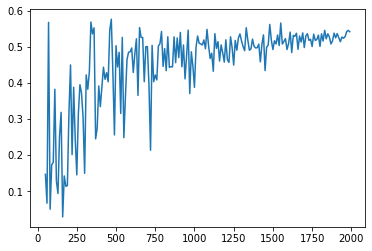

In [44]:
sample_sizes = range(50, len(annotations_df.label_num), 10)

vectorizer = TfidfVectorizer(
    encoding='utf-8',
    min_df=2, 
    max_df=0.8, 
    binary=False,
    norm='l2',
    use_idf=True 
)

# Classification
lr = LogisticRegression()
x_values = []
y_values = []
scores_l = []

for i in sample_sizes:
    sample_df = annotations_df.sample(n=i)
    y_opinions = sample_df["label_num"]
    tfidf_m = vectorizer.fit_transform(sample_df.text)
    X_opinions = pd.DataFrame(tfidf_m.toarray(), index=y_opinions, columns=vectorizer.get_feature_names())
    # Cross validation
    scores = cross_validate(lr, X_opinions, y_opinions, cv=5, scoring=['accuracy', 'f1', 'f1_macro', 'f1_micro'])
    scores_l.append(scores)
    x = len(y_opinions)
    x_values.append(x)
    y = np.mean(scores.get("test_f1"))
    y_values.append(y)

plt.plot(x_values, y_values);

In [45]:
baseline_accuracy = sum(y_opinions)/len(y_opinions)
baseline_precision = baseline_accuracy
baseline_recall = 1.0
baseline_f1 = 2*baseline_precision*baseline_recall/(baseline_precision+baseline_recall)
print("Baseline accuracy:", round(baseline_accuracy, 3))
print("Baseline F1:", round(baseline_f1, 3))

Baseline accuracy: 0.455
Baseline F1: 0.626


In [46]:
lr = LogisticRegression()
scores = cross_validate(lr, X_opinions, y_opinions, cv=10, scoring=['accuracy', 'f1', 'f1_macro', 'f1_micro'])
print("Test f1: "+str(np.mean(scores.get("test_f1"))))
print("Test accuracy: "+str(np.mean(scores.get("test_accuracy"))))

Test f1: 0.5534272550073224
Test accuracy: 0.6532663316582915


In [47]:
y_opinions = annotations_df["label_num"]
tfidf_m = vectorizer.fit_transform(annotations_df.text)
X_opinions = pd.DataFrame(tfidf_m.toarray(), index=y_opinions, columns=vectorizer.get_feature_names())
lr.fit(X_opinions, y_opinions)
y_best = lr.predict(X_opinions)

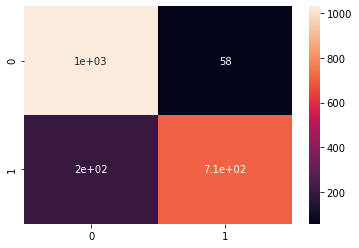

In [48]:
confusion_m = metrics.confusion_matrix(y_opinions, y_best)
sn.heatmap(confusion_m, annot=True);